In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
data = pd.read_csv("ShoniData.csv")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
test_set = pd.read_csv("test_data.csv")


In [3]:
play_data = data[0:200000].copy() #get some data messwith, we can get more data to train our models later
test = data[250000:250100]
#remove elements were a value is unkown
#alternatively we could replace is by a random value but that could be attempted later
play_data = play_data.drop(play_data[play_data.age_band_of_driver == -1].index)
play_data = play_data.drop(play_data[play_data.number_of_vehicles == -1].index)
play_data = play_data.drop(play_data[play_data.weather_conditions == -1].index)
play_data = play_data.drop(play_data[play_data.age_band_of_driver == -1].index)
play_data = play_data.drop(play_data[play_data.skidding_and_overturning == -1].index)
play_data = play_data.drop(play_data[play_data.first_point_of_impact == -1].index)
play_data = play_data.drop(play_data[play_data.road_type == -1].index)

test = test.drop(test[test.age_band_of_driver == -1].index)
test = test.drop(test[test.number_of_vehicles == -1].index)
test = test.drop(test[test.weather_conditions == -1].index)
test = test.drop(test[test.age_band_of_driver == -1].index)
test = test.drop(test[test.road_type == -1].index)
test = test.drop(test[test.skidding_and_overturning == -1].index)

a = play_data.reset_index()
play_data = a
b = test.reset_index()
test = b

X = play_data[["speed_limit","weather_conditions","number_of_vehicles",
               "road_type","accident_severity","day_of_week"]]

Xtest = test[["speed_limit","weather_conditions","number_of_vehicles",
               "road_type","accident_severity","day_of_week"]]


Xtest_set = test_set[["Speed_limit","Weather_Conditions","Number_of_Vehicles",
              "Road_Type","Accident_Severity","Day_of_Week"]]


#this is the y variable
Y = play_data["number_of_casualties"] #casualties is our interest variable Y
Ytest = test["number_of_casualties"]


In [5]:
from sklearn.ensemble.forest import RandomForestClassifier

#Create the model with 100 trees

model = RandomForestClassifier(n_estimators = 100)

#Now fit this Random Forest on the training data:
model.fit(X,Y)


NameError: name 'Ypred' is not defined

Score is = 0.6


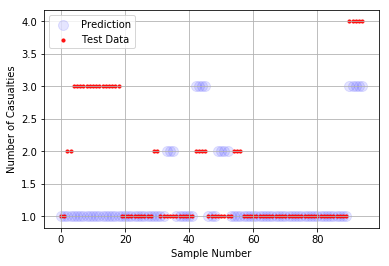

In [9]:
Ypred = model.predict(Xtest)
index = np.arange(len(Ypred))
plt.scatter(index,Ypred,s = 100, alpha = 0.1, c = "blue",label = "Prediction")
plt.scatter(index,Ytest, s = 10,alpha = 0.9, c = "red",label = "Test Data")

plt.grid()
plt.xlabel("Sample Number")
plt.ylabel("Number of Casualties")
plt.legend()

score = sklearn.metrics.accuracy_score(Ytest, Ypred)
print ("Score is = " + str(score))

plt.savefig("random_forest_270000_100.pdf")

In [8]:
Ypred_final = model.predict(Xtest_set)
Ypred_final

array([1., 1., 1., ..., 1., 1., 1.])